# Credit EDA Case Study-Previous_application Dataset

In [1]:
#importing necessary libraries and importing the dataset from desired location
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#df=pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/eJ5zayg0OnnX5PqMvAR8KQd9p/titanicmod.csv')
df=pd.read_csv('C:/Users/Gaurav/Desktop/Datasets/Credit Project/previous_application.csv')

In [2]:
#application dataset
application=pd.read_csv('C:/Users/Gaurav/Desktop/Datasets/Credit Project/application_data.csv')

In [3]:
#taking out target variable from application along with SK_ID_CURR
app=application.iloc[:,:2]

In [5]:
#merging application and previous application datasets by  SK_ID_CURR column
application_prev = app.merge(df, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [10]:
#Taking 1lakhs sample for analysisng the dataset
df_sample=application_prev.sample(100000, replace=True,random_state=1)

In [11]:
df_sample['TARGET'].value_counts()

0    91402
1     8598
Name: TARGET, dtype: int64

In [19]:
df_sample.isnull().sum()/len(df_sample.index)*100

SK_ID_CURR                      0.000
TARGET                          0.000
SK_ID_PREV                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    21.768
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_GOODS_PRICE                22.614
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
CNT_PAYMENT                    21.768
NAME_YIELD_GROUP                0.000
PRODUCT_COMB

In [18]:
#Removing columns with more tan 49% null values in them
pct_null = df_sample.isnull().sum() / len(df_sample)
missing_features = pct_null[pct_null > 0.49].index
df_sample.drop(missing_features, axis=1, inplace=True)

In [10]:
df_sample['NAME_CONTRACT_STATUS'].value_counts()

Approved        61900
Canceled        18974
Refused         17598
Unused offer     1533
Name: NAME_CONTRACT_STATUS, dtype: int64

In [20]:
#cecking some summary stats for below variables
df_sample[['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_TERMINATION','DAYS_LAST_DUE_1ST_VERSION']].describe().T


,count,mean,std,min,25%,50%,75%,max
AMT_ANNUITY,78232.0,15791.189828,14604.495650,0.0,6252.4800,11215.6425,20492.145,234478.395
AMT_GOODS_PRICE,77386.0,225731.110086,315950.935623,0.0,49550.0625,109955.2500,229500.000,4050000.000
CNT_PAYMENT,78232.0,16.025348,14.585231,0.0,6.0000,12.0000,24.000,84.000
DAYS_FIRST_DRAWING,60411.0,341857.870934,89547.132375,-2919.0,365243.0000,365243.0000,365243.000,365243.000
DAYS_TERMINATION,60411.0,82376.895036,153554.602988,-2791.0,-1271.0000,-494.0000,-41.000,365243.000
DAYS_LAST_DUE_1ST_VERSION,60411.0,33687.261095,106742.385728,-2801.0,-1243.0000,-360.0000,137.000,365243.000


Notice that the minimum is 0, max is 433014, the mean is 558 and median (50%) is 440. There's a significant variation in the 25th and the 75th percentile as well (176 to 651). 
Thus, imputing this with mean/median seems quite biased, and so we should remove the NaNs.

In [ ]:
#not_fraud=df_sample[df_sample.TARGET==0]
#fraud=df_sample[df_sample.TARGET==1]

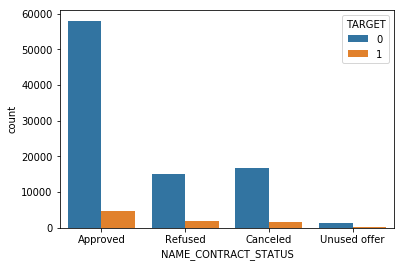

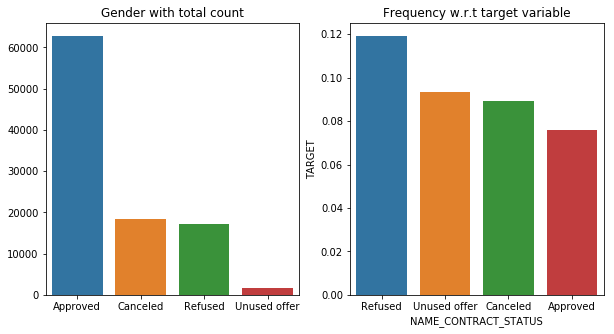

In [117]:
#Doing bivariate analysis for NAME_CONTRACT_STATUS variable with the Target variable
sns.countplot(x='NAME_CONTRACT_STATUS',hue='TARGET',data=df_sample)
cat_perc = df_sample[['NAME_CONTRACT_STATUS', 'TARGET']].groupby(['NAME_CONTRACT_STATUS'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_sample['NAME_CONTRACT_STATUS'].value_counts()
plt.figure(1)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Contract status of previous application')
sns.barplot(x=temp.index, y=temp.values)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='NAME_CONTRACT_STATUS', y='TARGET',data=b)
plt.show()

There are four types of contract_status in the previous application data: Approved,Cancelled,refused,unused offer.
Approved are almost triple the number aorund 60k.

Tn terms of percent of defaults for current applications in the sample, clients with history of previous applications have largest percents of defaults when in their history contract statuses are Refused about 12%, followed by Unused offer,Canceled and Approved (lowest percent of defaults in current applictions, with less than 8%).

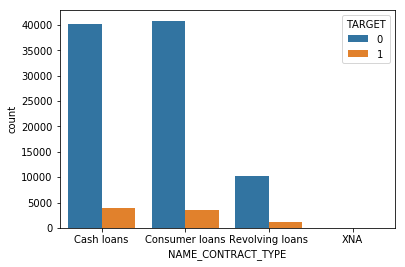

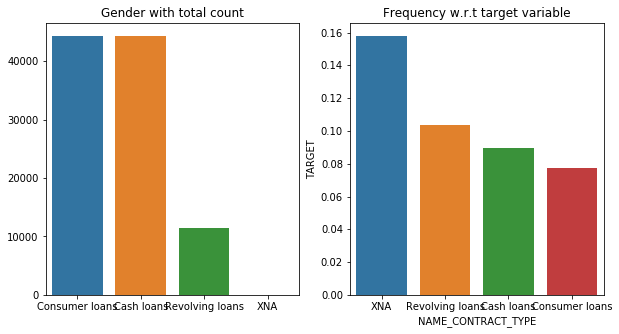

In [123]:
#Doing bivariate analysis for NAME_CONTRACT_TYPE variable with the Target variable
sns.countplot(x='NAME_CONTRACT_TYPE',hue='TARGET',data=df_sample)
cat_perc = df_sample[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_sample['NAME_CONTRACT_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('CONTRACT_TYPE')
sns.barplot(x=temp.index, y=temp.values)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='NAME_CONTRACT_TYPE', y='TARGET',data=b)
plt.show()

There are three types of contract in the previous application data: Cash loans, Consumer loans, Revolving loans. Cash loans and Consumer loans are almost the same number aorund 40k whilst Revolving loans are 15K.

The percent of defauls loans for clients with previous applications is different for the type of previous applications contracts, decreasing from near about 10% for Revolving loans then about 9.5% for Cash loans and 8% for Consumer loans.

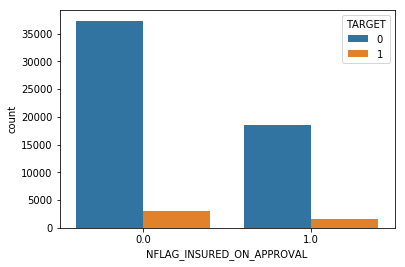

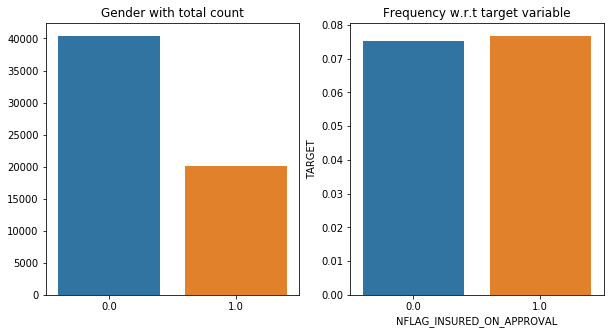

In [129]:
#Doing bivariate analysis for NFLAG_INSURED_ON_APPROVAL variable with the Target variable
sns.countplot(x='NFLAG_INSURED_ON_APPROVAL',hue='TARGET',data=df_sample)
cat_perc = df_sample[['NFLAG_INSURED_ON_APPROVAL', 'TARGET']].groupby(['NFLAG_INSURED_ON_APPROVAL'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_sample['NFLAG_INSURED_ON_APPROVAL'].value_counts()
plt.figure(1)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Weather applicant had Insurance or not')
sns.barplot(x=temp.index, y=temp.values)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='NFLAG_INSURED_ON_APPROVAL', y='TARGET',data=b)
plt.show()

The frquency of the client with insurance is same,there no much difference weather client had insurance or not in the previous application

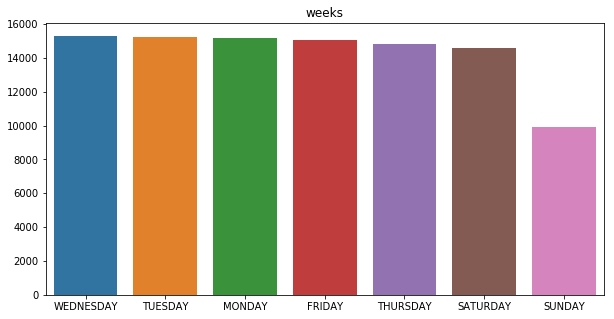

In [134]:
#checking for univariate Analysis for WEEKDAY_APPR_PROCESS_START variable
temp = df_sample['WEEKDAY_APPR_PROCESS_START'].value_counts()
plt.figure(figsize=(10,5))
plt.title('weeks')
sns.barplot(x=temp.index, y=temp.values)




It is strange that client applied only on weekdays for the Previous application.The number of previous application is same through the weekdays. 




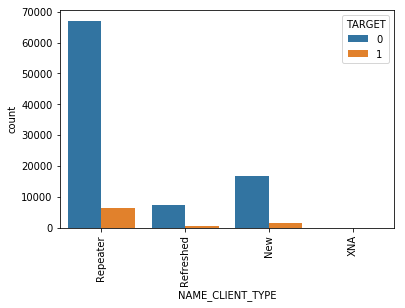

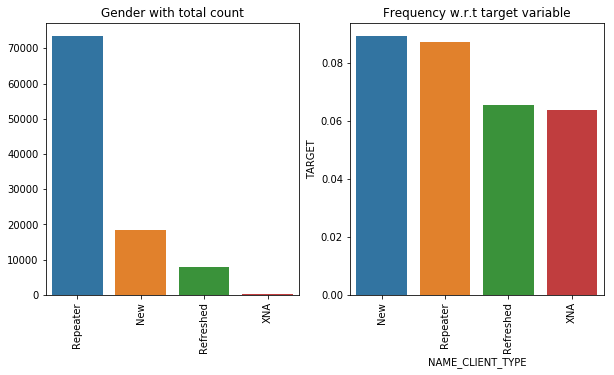

In [135]:
#Doing bivariate analysis for NAME_CLIENT_TYPE variable with the Target variable
sns.countplot(x='NAME_CLIENT_TYPE',hue='TARGET',data=df_sample)
plt.xticks(rotation=90)
cat_perc = df_sample[['NAME_CLIENT_TYPE', 'TARGET']].groupby(['NAME_CLIENT_TYPE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_sample['NAME_CLIENT_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Applicants CLIENT_TYPE')
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='NAME_CLIENT_TYPE', y='TARGET',data=b)
plt.xticks(rotation=90)
plt.show()

Most of the previous applications have client type Repeater (70k), just over 20K are New and ~10K are Refreshed.

In terms of default percent for current applications of clients with history of previous applications, current clients with previous applications have values of percent of defaults ranging from from 8.5%, 8.25% and 7% corresponding to client types in the past New, Repeater and Refreshed, respectivelly.


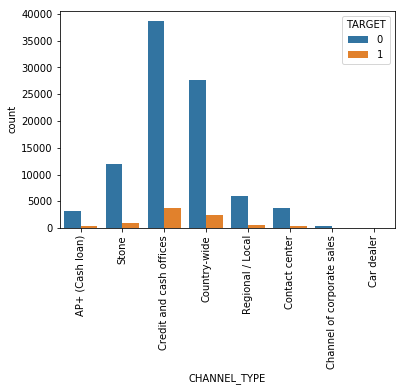

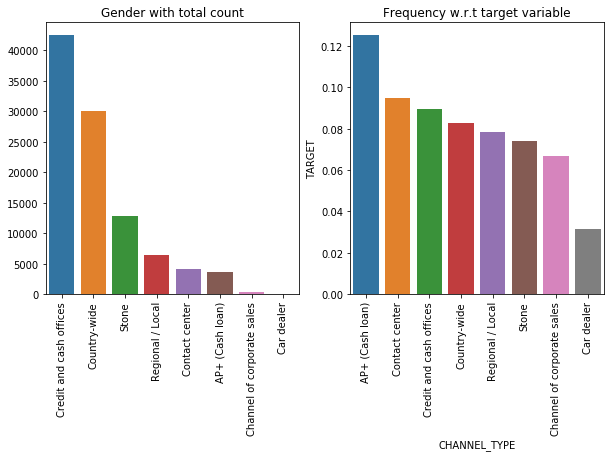

In [136]:
#Doing bivariate analysis for CHANNEL_TYPE variable with the Target variable
sns.countplot(x='CHANNEL_TYPE',hue='TARGET',data=df_sample)
plt.xticks(rotation=90)
cat_perc = df_sample[['CHANNEL_TYPE', 'TARGET']].groupby(['CHANNEL_TYPE'],as_index=False).mean()
b=cat_perc.sort_values(by='TARGET', ascending=False)
#sns.barplot(x='CODE_GENDER', y='TARGET',data=b)
temp = df_sample['CHANNEL_TYPE'].value_counts()
plt.figure(1)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('channel we acquired the client on the previous application')
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Frequency w.r.t target variable')
sns.barplot(x='CHANNEL_TYPE', y='TARGET',data=b)
plt.xticks(rotation=90)
plt.show()

Most of the previous applications have CHANNEL type Credit & Cash offices (40k), just over 30K are Country-wide and ~12K are Stone.
In terms of default percent for current applications of clients with history of previous applications, current clients with previous applications have values of percent of defaults ranging from near about 12.5%, 9% and 8.5% corresponding to CHANNEL types in the past AP(Cash loans),Contract center,Credit & Cash offices respectivelly.


<Figure size 432x288 with 0 Axes>

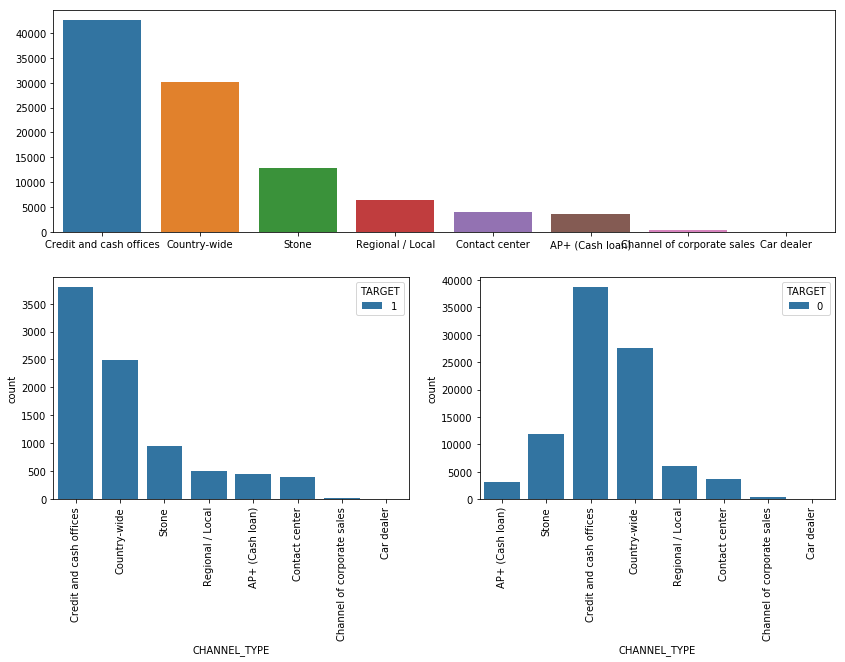

In [93]:
#import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

#gs = gridspec.GridSpec(2, 2)

#plt.figure(1)
#plt.figure(figsize=(14,9))
#ax = plt.subplot(gs[1, 0]) # row 0, col 0
#sns.countplot(x='CHANNEL_TYPE',hue='TARGET',data=fraud)
#plt.xticks(rotation=90)

#ax = plt.subplot(gs[1, 1]) # row 0, col 1
#sns.countplot(x='CHANNEL_TYPE',hue='TARGET',data=not_fraud)
#plt.xticks(rotation=90)

#ax = plt.subplot(gs[0, :]) # row 1, span all columns
#temp = df_sample['CHANNEL_TYPE'].value_counts()
#sns.barplot(x=temp.index, y=temp.values)